<a/ id='top'></a>

# CSCI4022 Homework 7; Undirected Graphs
## Due Monday, April 11 at 11:59 pm to Canvas and Gradescope

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) |
---


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import networkx as nx


C:\Users\zacha\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 1 (Processing; 5 pts)

One area that makes a natural case for community detection is based on interactions of people or fictional characters.  The Marvel universe is quite large, and in the last decades has expanded via cinema to be one of the most value IPs in the world.  That cinematic universe is largely based on a decades-older set of comics, and from those comics we approach the idea of community detection.  Suppose we have a list of comics, from which we have extracted all of the *pairs* of characters that appear in this comic.  (If interested, you may find the original data at [this location](
http://syntagmatic.github.io/exposedata/marvel/) in the csv `Hero Social Network Data`)

This is a very large data set, with many characters only belonging to one small subgroup, and for large number of communities makes a good fit for a large-scale community detection algorithm.  For our exercise, we will instead attempt a higher-level analysis of only the most central Marvel universe characters.

- The dataset has been reduced to only include the set of the 40 most-frequently occuring heros.
- The edges (i,j) contianing both $i$ and $j$ from that set have been collected into the dataframe/matrix loaded in `marvel_network_dense.csv`.

Some preprocessing of the data has been done to make it suitable for community detection.  Your goal in this problem is to describe what was done, and speculate as to why it makes the data more suitable for either BigCLAM and/or Graph Partitioning (by Laplacians).

In [2]:
df=pd.read_csv('../data/marvel_network_dense.csv')
mat=np.array(df.iloc[:,1:])
df.head(3)

,Unnamed: 0,SPIDER-MAN/PETER PAR,QUICKSILVER/PIETRO M,IRON MAN/TONY STARK,SCARLET WITCH/WANDA,HAWK,CYCLOPS/SCOTT SUMMER,BEAST/HENRY &HANK& P,HULK/DR. ROBERT BRUC,INVISIBLE WOMAN/SUE,...,WASP/JANET VAN DYNE,BLACK WIDOW/NATASHA,"JAMESON, J. JONAH",DR. STRANGE/STEPHEN,PATRIOT/JEFF MACE,SUB-MARINER/NAMOR MA,DAREDEVIL/MATT MURDO,SHADOWCAT/KATHERINE,HERCULES [GREEK GOD],NIGHTCRAWLER/KURT WA
0,SPIDER-MAN/PETER PAR,0.0,11.0,40.0,36.0,24.0,26.0,23.0,43.0,38.0,...,33.0,23.0,263.0,31.0,0.0,24.0,47.0,6.0,18.0,17.0
1,QUICKSILVER/PIETRO M,12.0,0.0,57.0,105.0,75.0,24.0,29.0,18.0,23.0,...,65.0,38.0,1.0,7.0,0.0,12.0,5.0,3.0,52.0,3.0
2,IRON MAN/TONY STARK,54.0,53.0,0.0,187.0,130.0,13.0,66.0,33.0,59.0,...,149.0,41.0,13.0,21.0,0.0,45.0,31.0,6.0,44.0,7.0


In [3]:
mat=mat+mat.T  #CHANGE 1

In [4]:
def density(mat):
    return(np.sum(np.sum(np.equal(mat,0)))/(np.shape(mat)[0]*np.shape(mat)[1]))
density(mat)
val=0
check=1
while val<.8:
    check+=1
    mat1=mat.copy()
    mat1[mat1<check]=0
    val=density(mat1) # CHANGE 2: using mat1 instead of mat

In [5]:
A=np.zeros((len(mat1), len(mat1)))
A[mat1>0]=1
nofriends=np.where(np.sum(A, axis=0)==0)[0][0] #CHANGE 3: using this variable
A=np.delete(A,nofriends, axis=0)
A=np.delete(A,nofriends, axis=1)
names=np.array(df.columns[1:])
names=np.delete(names,nofriends)


What did the 3 "CHANGE" commented on above accomplish?  Why would they possibly be beneficial for our algorithms?

***
<a/ id='p2'></a>
[Back to top](#top)
# Problem 2 (Initialization; 10 pts)
Here is the result of our processing from Problem 1:

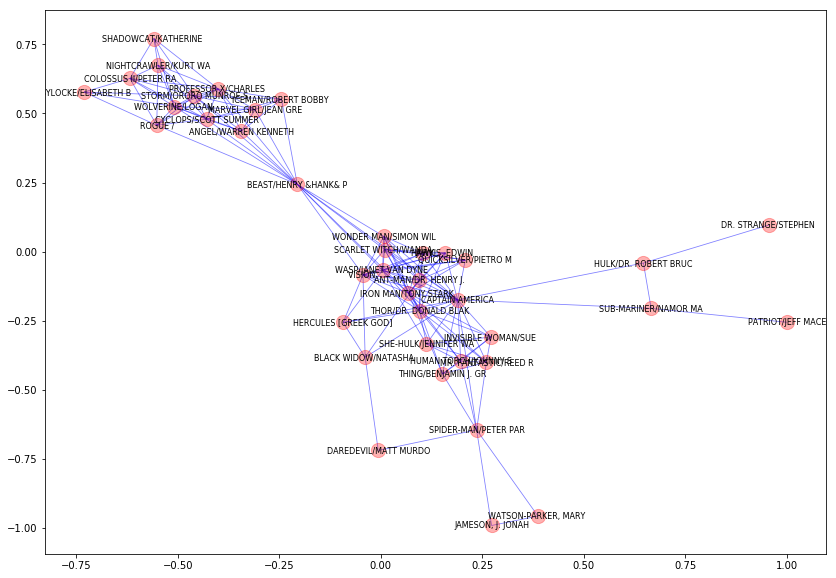

In [6]:
G=nx.Graph()
neighbors=dict.fromkeys(range(len(A)))

for i in range(len(A)):
    neighbors[i]=np.where(A[:,i])[0]
# neighbors

nodes=[i for i in range(len(A))]
G.add_nodes_from(nodes)
for i in range(len(A)):
    toadd=neighbors[i]
    for j in range(len(toadd)):
        G.add_edge(i,toadd[j])

fig, ax = plt.subplots(figsize=(14,10))      
np.random.seed(4022)
pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations; it saves the xy coords of each vertex
nx.draw_networkx_nodes(G, pos, node_size=200, alpha=.3); #node colors easy to see labels over
nx.draw_networkx_edges(G, pos, width=0.8, alpha=0.5, edge_color='blue'); #draw edges, using xy-node layout provided
labels=dict(zip(range(len(A)),names))
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black'); #label vertices by index/number

Our goal is to come up with a sensibile initialization before we run BigCLAM.  The [original paper](https://cs.stanford.edu/people/jure/pubs/bigclam-wsdm13.pdf) for BigCLAM suggests using "locally minimal neighborhoods."  Rather than figure out a new algorithm, let's try initializing by:

1) Run PageRank on the Graph, using a transition matrix `M` formed starting with either the adjacency `A` or dictionary `neighbors` objects given.

2) Extract the node with the highest PageRank as an initial "center" to get community affiliation of "1" for community $A$.

3) For community B's intial center, get the node with the highest PageRank that's not connected to the node in 2).

4) For community C's intial center, get the node with the highest PageRank that's not connected to either of the nodes in 2) and 3).

Plot your resulting initialization, as in the example code below.

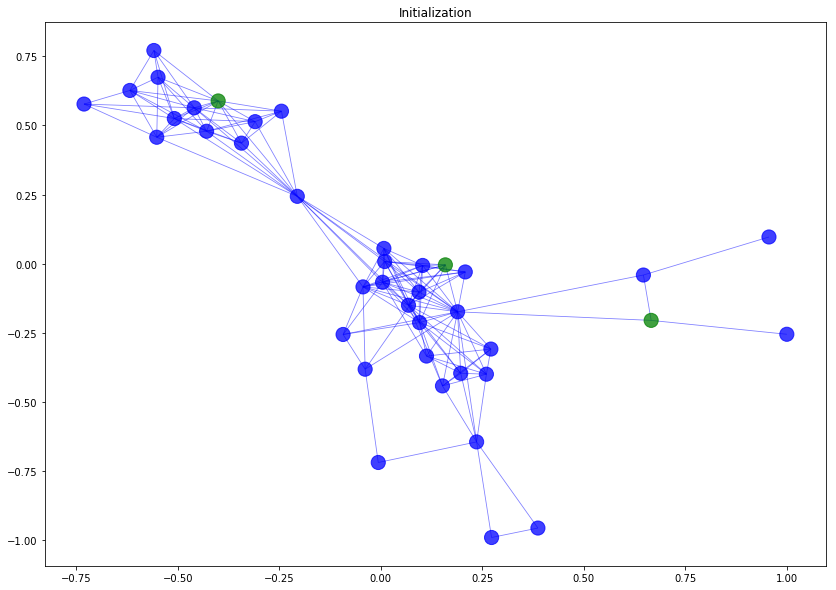

In [7]:
#Here's some colors on this
centers=set([19,28,34])
colorf=lambda x: 'green' if (x in centers) else 'blue'
colors=[colorf(node) for node in nodes]
#draw the nodes, using xy-node layout 'pos' provided
fig, ax = plt.subplots(figsize=(14,10))      
np.random.seed(4022)
pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations; it saves the xy coords of each vertex
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=200, alpha=.75); #node colors easy to see labels over
nx.draw_networkx_edges(G, pos, width=0.8, alpha=0.5, edge_color='blue'); #draw edges, using xy-node layout provided
# nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black'); #label vertices by index/number
ax.set_title('Initialization');

In [8]:
#Do the thing!


***
<a/ id='p3'></a>
[Back to top](#top)
# Problem 3 (Running BigCLAM: 15 pts)

Run BigCLAM on the graph from Problems 1-2.

- Use 3 communities *AND* a background community such that the probability of any 2 members sharing an edge from that community is 1% (Reflect: is this what the paper calls $\varepsilon$ or $\delta$?)
- You may iterate over the nodes in the order of their index instead of shuffling them
- Run until convergence by the $L_2$ norm  (element-wise over F) to within $10^{-5}$
- At the end, create 3 side-by-side plots of the original graph colored by the 3 community affiliation columns.

# Problem 4 (Graph Partitions: 15 pts)

Consider doing cuts or finding non-overlapping communities on the same graph as we used in problems 2-3.

### Part 1:
Find the Fiedler vector for the graph.  Plot the sorted Fiedler vector.  Use the `A` matrix defined above to get started.



### Part 2: Partitions

#### Part 2a:

Partition the graph into 2 graphs using this vector.  Include a picture of the associated *cut* of the graph.


In [9]:
# partition=#make the partition
# To include colors in a networkx graph like the given one above:
# nx.draw(G, node_color=partition, node_size=800)



#### Part 2b:

Partition the graph into 3 subgraphs using the Fiedler vector.  One natural way to do so is to partitition at the two largest jumps in the vector and not use $y=0$.  Include both associated *cuts* in another picture of the graph.    If this doesn't work well, is there an ad hoc way you would make it better?


#### Part 2c:
Partition the graph into 4 subgraphs using the Fiedler vector **and** the next/third eigenvector. Do this by grouping the nodes into 4 groups: the ones where both eigenvectors are positive (+,+), where both eigenvectors are negative (-,-), and the other two cases (+,-), (-,+).


#### Part 2d:

Of the 3 partitions above, which do you think were most appropriate.  Why?
